In [2]:
#import QNN as qnn
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

In [3]:
def create_cat_state(alpha, size=10):
    """Create a cat state with given alpha and Hilbert space size."""
    cat_state = qt.coherent(size, alpha) + qt.coherent(size, -alpha)
    cat_state /= cat_state.norm()  # Normalize the state
    return cat_state

def wigner_log_negativity(cat_state, xvec, yvec):
    W = qt.wigner(cat_state, xvec, yvec)
    dx = xvec[1] - xvec[0]  # Assuming uniform spacing
    dy = yvec[1] - yvec[0]

    integral = np.sum(np.abs(W)) * dx * dy
    return np.log(integral)

# Parameters for the cat state and Wigner function
alpha = range(500)  # Coherent state amplitude
size = 10  # Hilbert space size
xvec = np.linspace(-np.pi, np.pi, 100)  # X-axis values for Wigner function
yvec = np.linspace(-np.pi, np.pi, 100)  # Y-axis values for Wigner function

# Create cat state and calculate its Wigner log negativity
def wig(alpha, size, xvec, yvec):
    WLN = []
    for i in alpha:
        cat_state = create_cat_state(i, size)
        log_neg = wigner_log_negativity(cat_state, xvec, yvec)
        WLN.append(log_neg)
    
    return WLN

W = wig(alpha, size, xvec, yvec)

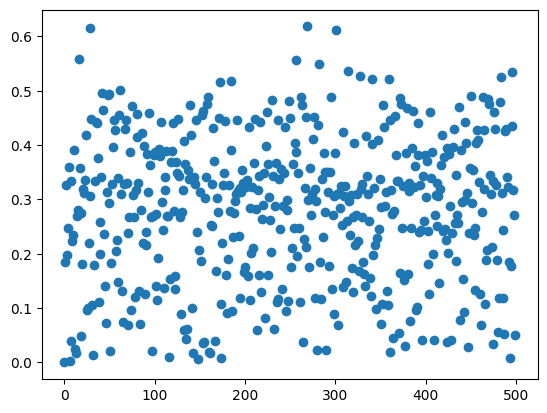

In [4]:
len(W)
plt.scatter(alpha, W)